In [1]:
%matplotlib inline

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import skimage
from scipy import ndimage
from skimage.morphology import label
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [37]:
# Input data files are available in the "../input/" directory.
#Simple CNN keras
from keras.layers import Lambda
from keras.models import Model , load_model
from keras.models import Sequential
from keras.layers import concatenate
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from keras.losses import binary_crossentropy
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2DTranspose
from keras import backend as K

In [3]:
print("done")

done


In [4]:
import tensorflow as tf
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
from subprocess import check_output
import os

In [5]:
from skimage.transform import rescale, resize, downscale_local_mean
# Any results you write to the current directory are saved as output.

In [6]:
train_dir = "/input/stage1_train"

In [7]:
train_images = [i for i in os.listdir(train_dir)]

In [8]:
len(train_images)

670

In [9]:
bad_images = ['7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80','b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe','9bb6e39d5f4415bc7554842ee5d1280403a602f2ba56122b87f453a62d37c06e','58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921']

In [10]:
messy_masks = ['a09ae9559f817b104e049e5bb01cf4ad1b87e3ef7fad3dcf932b6585ca3edc05']

In [11]:
final_images = []

for dirs in train_images:
    final_images.append(plt.imread(train_dir + '/' + dirs + '/' + 'images/' + dirs+ '.png'))

    

In [12]:
label_masks = []
for j,dirs in enumerate(train_images):
    #print(dirs)
    maximum = np.zeros(final_images[j].shape[0:2])
    for i,img in enumerate(os.listdir(train_dir +'/' +dirs + "/" + "masks/")):
        if img == ".DS_Store":
             continue
        else:
            image = plt.imread(train_dir + '/' + dirs + "/" + "masks/" + img)
            print(image.shape)
            maximum = np.maximum(maximum,image)
    label_masks.append(maximum)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024,

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(

(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(52

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 102

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(256, 320)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)

(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(256, 256)
(256, 256)

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(260, 347)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 320)
(256, 320)
(256, 320)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)

In [13]:
#Sanity check
for i in range(len(label_masks)):
    if label_masks[i].shape != final_images[i].shape[0:2]:
        print(i)
        print(label_masks[i].shape)
        print(final_images[i].shape)
        print("np")
    else:
        continue

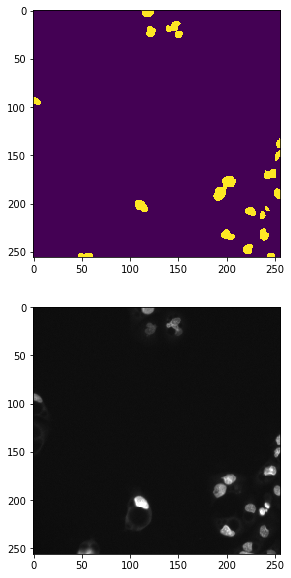

In [14]:
plt.figure(1,figsize= (10,10))
plt.subplot(2,1,1)
plt.imshow(label_masks[20])
plt.subplot(2,1,2)
plt.imshow(final_images[20])

In [15]:
label_masks = np.array(label_masks)

In [16]:
final_images = np.array(final_images)

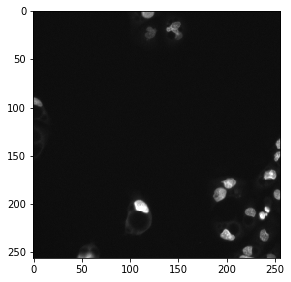

In [17]:
plt.figure(1.,figsize = (10,10))
#plt.subplot(2,1,1)
#plt.imshow(label_masks[20])
plt.subplot(2,1,1) 
plt.imshow(final_images[20])

In [18]:
label_masks[20].shape

(256, 256)

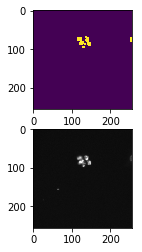

In [19]:
plt.figure(1)
plt.subplot(2,1,1)
plt.imshow(label_masks[10])
plt.subplot(2,1,2) 
plt.imshow(final_images[10])

In [20]:
#Removing bad images
final_images = list(final_images)
label_masks = list(label_masks)
bad_images = ['7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80','b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe','9bb6e39d5f4415bc7554842ee5d1280403a602f2ba56122b87f453a62d37c06e','58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921']
for i,dirs in enumerate(train_images):
    if dirs in bad_images:
        final_images.pop(i)
        label_masks.pop(i)

In [21]:
len(final_images) == len(label_masks)

True

In [22]:
final_images = np.array(final_images)
label_masks = np.array(label_masks)

In [23]:
#Data Augumentation
aug_images = []
aug_masks = []
for i in range(len(final_images)):
    if i%4 == 0:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][0:temp_shape[0]//2,0:temp_shape[1]//2,:]
        temp_mask = label_masks[i][0:temp_shape[0]//2,0:temp_shape[1]//2]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 1:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][0:temp_shape[0]//2,temp_shape[1]//2:,:]
        temp_mask = label_masks[i][0:temp_shape[0]//2,temp_shape[1]//2:]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 2:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][temp_shape[0]//2:,temp_shape[1]//2:,:]
        temp_mask = label_masks[i][temp_shape[0]//2:,temp_shape[1]//2:]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 3:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][temp_shape[0]//2:,0:temp_shape[1]//2,:]
        temp_mask = label_masks[i][temp_shape[0]//2:,0:temp_shape[1]//2]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)

In [24]:
print(aug_images[1].shape)
print(final_images[1].shape)

(128, 128, 4)
(256, 256, 4)


In [25]:
final_images_final = np.concatenate([final_images,aug_images])

In [26]:
label_masks_final = np.concatenate([label_masks,aug_masks])

In [27]:
len(label_masks_final)

1332

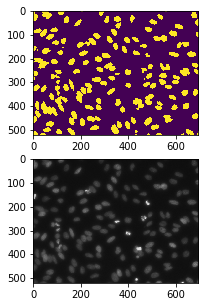

In [28]:
plt.figure(1 ,figsize = (5,5))
plt.subplot(2,1,1)
plt.imshow(np.squeeze(label_masks[61]))
plt.subplot(2,1,2) 
plt.imshow(final_images[61])

In [29]:
for  i in range(len(label_masks_final)):
    print("i",end = "")
    try:
        final_images_final[i] = resize(final_images_final[i] , (512,512,3) , preserve_range=True)
        label_masks_final[i] = resize(label_masks_final[i] , (512,512,1) , preserve_range=True)
    except:
        print(final_images_final[i].shape)

ii

/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii

In [30]:
final_images_final = np.stack(final_images_final)
label_masks_final = np.stack(label_masks_final)

In [31]:
print(final_images_final.shape)
print(label_masks_final.shape)

(1332, 512, 512, 3)
(1332, 512, 512, 1)


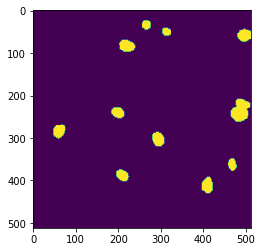

In [32]:
plt.imshow(np.squeeze(label_masks_final[1]))

In [33]:
#Ones and Zeros
for i in range(len(label_masks_final)):
    label_masks_final[i][label_masks_final[i] > 0.5] = 1
    label_masks_final[i][label_masks_final[i] <= 0.5] = 0
    

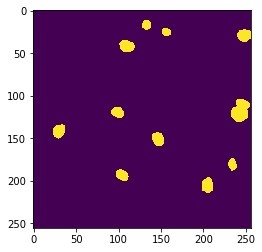

In [34]:
plt.imshow(np.squeeze(label_masks[1]))

In [35]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = label(y_true_in > 0.5)
    y_pred = label(y_pred_in > 0.5)
    
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.array(np.mean(metric), dtype=np.float32)

def my_iou_metric(label, pred):
    metric_value = tf.py_func(iou_metric_batch, [label, pred], tf.float32)
    return metric_value

In [41]:
# Build U-Net model
inputs = Input((512, 512, 3))
s = inputs

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.01) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.01) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.02) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.02) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.03) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.02) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.02) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.01) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.01) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])

In [ ]:
model.load_weights("/model/low_dropout_10epochs.h5")

In [49]:
print("yes")

yes


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[my_iou_metric])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 512, 512, 3)   0                                            
____________________________________________________________________________________________________
conv2d_20 (Conv2D)               (None, 512, 512, 16)  448         input_2[0][0]                    
____________________________________________________________________________________________________
dropout_10 (Dropout)             (None, 512, 512, 16)  0           conv2d_20[0][0]                  
____________________________________________________________________________________________________
conv2d_21 (Conv2D)               (None, 512, 512, 16)  2320        dropout_10[0][0]                 
___________________________________________________________________________________________

In [53]:
earlystopper = EarlyStopping(monitor = 'val_loss',patience=3, verbose=1)

In [38]:
label_masks_final.shape

(1332, 512, 512, 1)

In [38]:
#checkpointer = ModelCheckpoint("weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor = 'val_loss',verbose=1, save_best_only=True)

In [54]:
results = model.fit(final_images_final, label_masks_final, validation_split=0.1, batch_size=10, epochs=10 ,callbacks=[earlystopper],verbose = 1)

Train on 1198 samples, validate on 134 samples
Epoch 1/10
1198/1198 [==============================] - 204s - loss: 0.1060 - my_iou_metric: 0.2566 - val_loss: 0.0932 - val_my_iou_metric: 0.2457
Epoch 2/10
1198/1198 [==============================] - 176s - loss: 0.0992 - my_iou_metric: 0.2576 - val_loss: 0.0839 - val_my_iou_metric: 0.2651
Epoch 3/10
1198/1198 [==============================] - 176s - loss: 0.0933 - my_iou_metric: 0.2811 - val_loss: 0.0849 - val_my_iou_metric: 0.2826
Epoch 4/10
1198/1198 [==============================] - 176s - loss: 0.0895 - my_iou_metric: 0.2802 - val_loss: 0.0744 - val_my_iou_metric: 0.2684
Epoch 5/10
1198/1198 [==============================] - 176s - loss: 0.0932 - my_iou_metric: 0.2723 - val_loss: 0.0794 - val_my_iou_metric: 0.2317
Epoch 6/10
1198/1198 [==============================] - 176s - loss: 0.0843 - my_iou_metric: 0.2989 - val_loss: 0.0735 - val_my_iou_metric: 0.2980
Epoch 7/10
1198/1198 [==============================] - 176s - loss: 0.

In [55]:
print("over")

over


In [56]:
results.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
model.save_weights("low_dropout_10epochs+10.h5")

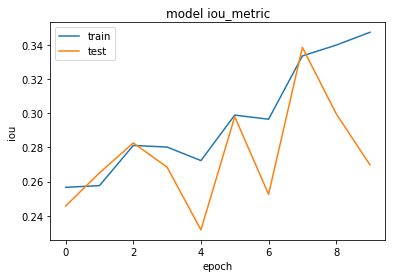

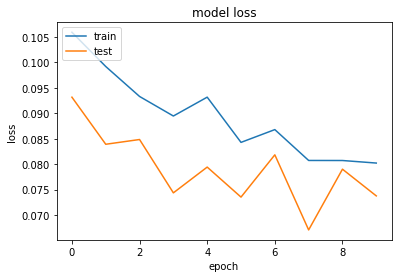

In [58]:
plt.plot(results.history['my_iou_metric'])
plt.plot(results.history['val_my_iou_metric'])
plt.title('model iou_metric')
plt.ylabel('iou')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
#reading test set
test_dir = os.listdir("/input/stage1_test")

In [60]:
len(test_dir)

65

In [61]:
test_images = []
size_test = []
for dirs in test_dir:
    test_images.append(plt.imread("../input/stage1_test/"+ dirs + "/" + "images"+"/"+os.listdir("../input/stage1_test/"+ dirs + "/" + "images")[0]))
for i in range(len(test_images)):
    size_test.append([test_images[i].shape[0], test_images[i].shape[1]])
    test_images[i] = resize(test_images[i] , (512,512,3))
    

/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [62]:
test_images = np.array(test_images)
print(test_images.shape)

(65, 512, 512, 3)


In [63]:
prediction = model.predict(test_images)

In [64]:
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0

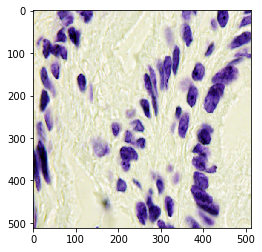

In [65]:
plt.imshow(np.squeeze(test_images[3]))

In [66]:
preds_test_upsampled = []
for i in range(len(prediction)):
    preds_test_upsampled.append(resize(np.squeeze(prediction[i]), 
                                       (size_test[i][0], size_test[i][1]), 
                                       mode='constant', preserve_range=True))

In [67]:
np.unique(prediction[1])

array([ 0.,  1.], dtype=float32)

In [68]:
preds_test_upsampled[1].shape

(512, 680)

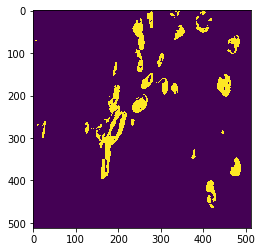

In [69]:
plt.imshow(np.squeeze(prediction[1]))

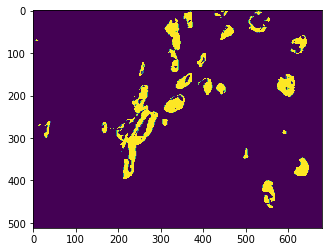

In [70]:
plt.imshow(np.squeeze(preds_test_upsampled[1]))

In [71]:
preds_test_upsampled[1].shape

(512, 680)

In [72]:
test_images[1].shape

(512, 512, 3)

In [73]:
for i in range(len(preds_test_upsampled)):
    preds_test_upsampled[i][preds_test_upsampled[i] > 0.5] = 1
    preds_test_upsampled[i][preds_test_upsampled[i] <= 0.5] = 0

In [74]:
# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)

In [75]:
list(rle_encoding(preds_test_upsampled[0]))

[300,
 1,
 302,
 1,
 304,
 1,
 779,
 19,
 799,
 1,
 801,
 19,
 909,
 9,
 1291,
 19,
 1311,
 1,
 1313,
 19,
 1421,
 9,
 1800,
 46,
 1881,
 5,
 1932,
 13,
 2313,
 44,
 2392,
 5,
 2398,
 1,
 2444,
 13,
 2825,
 45,
 2901,
 10,
 2955,
 15,
 3023,
 1,
 3025,
 1,
 3027,
 1,
 3337,
 45,
 3413,
 10,
 3467,
 15,
 3535,
 1,
 3537,
 1,
 3539,
 1,
 3850,
 43,
 3928,
 6,
 3980,
 13,
 4050,
 1,
 4362,
 43,
 4440,
 6,
 4492,
 13,
 4557,
 12,
 4875,
 42,
 4954,
 1,
 5004,
 11,
 5069,
 12,
 5387,
 42,
 5466,
 1,
 5516,
 11,
 5581,
 12,
 5807,
 2,
 5899,
 41,
 6030,
 5,
 6093,
 14,
 6319,
 2,
 6412,
 39,
 6604,
 16,
 6830,
 6,
 6925,
 36,
 7116,
 17,
 7342,
 6,
 7437,
 36,
 7628,
 17,
 7842,
 1,
 7854,
 8,
 7863,
 2,
 7884,
 3,
 7948,
 34,
 8140,
 17,
 8364,
 13,
 8378,
 1,
 8380,
 1,
 8395,
 7,
 8461,
 29,
 8652,
 17,
 8862,
 1,
 8877,
 9,
 8887,
 2,
 8900,
 1,
 8902,
 14,
 8972,
 28,
 9165,
 16,
 9374,
 1,
 9389,
 9,
 9399,
 2,
 9412,
 1,
 9414,
 14,
 9484,
 28,
 9677,
 16,
 9885,
 2,
 9897,
 16,
 9914

In [76]:
new_test_ids = []
rles = []
for n, id_ in enumerate(test_dir):
    rle = list(prob_to_rles(preds_test_upsampled[n]))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))

In [77]:
len(np.unique(new_test_ids))

65

In [78]:
sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('submit_final_low_drop_512-20epoch.csv', index=False)

In [2]:
import numpy 

In [5]:
X = np.random.rand(500,)

In [7]:
Y = np.random.rand(500,)

In [9]:
model = Sequential()

In [19]:
model = Sequential()
model.add(Dense(12, input_dim=1, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=1)

Train on 334 samples, validate on 166 samples
Epoch 1/150
334/334 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6933 - val_acc: 0.0000e+00
Epoch 2/150
334/334 [==============================] - 0s 420us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6933 - val_acc: 0.0000e+00
Epoch 3/150
334/334 [==============================] - 0s 440us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6934 - val_acc: 0.0000e+00
Epoch 4/150
334/334 [==============================] - 0s 322us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6934 - val_acc: 0.0000e+00
Epoch 5/150
334/334 [==============================] - 0s 323us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6935 - val_acc: 0.0000e+00
Epoch 6/150
334/334 [==============================] - 0s 385us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6936 - val_acc: 0.0000e+00
Epoch 7/150
334/334 [==============================] - 0s 407us/step - loss: 0.6930 - acc: 0.0000e

Epoch 114/150
334/334 [==============================] - 0s 346us/step - loss: 0.6919 - acc: 0.0000e+00 - val_loss: 0.6923 - val_acc: 0.0000e+00
Epoch 115/150
334/334 [==============================] - 0s 374us/step - loss: 0.6919 - acc: 0.0000e+00 - val_loss: 0.6925 - val_acc: 0.0000e+00
Epoch 116/150
334/334 [==============================] - 0s 349us/step - loss: 0.6919 - acc: 0.0000e+00 - val_loss: 0.6922 - val_acc: 0.0000e+00
Epoch 117/150
334/334 [==============================] - 0s 366us/step - loss: 0.6920 - acc: 0.0000e+00 - val_loss: 0.6923 - val_acc: 0.0000e+00
Epoch 118/150
334/334 [==============================] - 0s 382us/step - loss: 0.6918 - acc: 0.0000e+00 - val_loss: 0.6922 - val_acc: 0.0000e+00
Epoch 119/150
334/334 [==============================] - 0s 371us/step - loss: 0.6918 - acc: 0.0000e+00 - val_loss: 0.6923 - val_acc: 0.0000e+00
Epoch 120/150
334/334 [==============================] - 0s 380us/step - loss: 0.6918 - acc: 0.0000e+00 - val_loss: 0.6923 - val_a

In [24]:
len(history.history['val_loss'])

150

In [57]:
x = np.arange(15100)
plt.figure(1)
plt.plot(history.history['val_loss'])
plt.xticks(np.arange(min(x), max(x)+1, 10.0))

([<matplotlib.axis.XTick at 0x12fc5e2e8>,
  ...],
 <a list of 1510 Text xticklabel objects>)

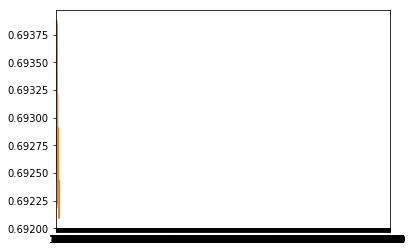

In [58]:
plt.show()